In [1]:
import xarray as xr
import numpy as np
import cmocean
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from datetime import datetime
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
ds = xr.open_dataset('../data/output/cm_mpw/cm_mpw_2013-01-01.nc')
nb_traj, nb_obs = ds.lon.shape

In [3]:
plot_crs = ccrs.PlateCarree()

def geo_map(ax, land=True):
    # ticks
    ax.set_xticks(np.arange(-95, -45, 10), crs=plot_crs)
    ax.set_yticks(np.arange(10, 40, 10), crs=plot_crs)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    # add land and coastline
    if land:
        ax.add_feature(cfeature.LAND, facecolor='0.4', zorder=1)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=1)
    ax.set_extent([-98, -52, 4, 31], crs=plot_crs)
    
def trajectories(ax, ids, t0, length):
    # smaller length at initial time
    if length > t0:
        length = t0
    
    time_r = range(t0-length, t0+1)
    keep = np.any(~np.isnan(ds.lon[ids, time_r]), 1)
    traj = list(zip(ds.lon[ids][keep, time_r], ds.lat[ids][keep, time_r]))
    
    s, v = [], []
    for x,y in traj:
        pts = np.array([x, y]).T.reshape(-1, 1, 2)
        s.extend(np.concatenate([pts[:-1], pts[1:]], axis=1))
        v.extend(np.arange(0, len(x)-1)/(len(x)-1))
    
    lc = LineCollection(s, cmap=cmocean.cm.ice_r, transform=ccrs.PlateCarree(), alpha=1.0)
    lc.set_array(v) # color per segments/lines
    lc.set_linewidth(0.25) # size of lines
    ax.add_collection(lc)
    
    # add tip
    ax.scatter(ds.lon[ids][keep,t0], ds.lat[ids][keep,t0], s=0.2, linewidth=0.5, c='k', marker='o', facecolors='fill', zorder=2)
    
    return s, v

In [4]:
# parameters
nb_traj_plots = 500
t0 = 100                # starting indices [0, nb_obs-traj_length]
traj_length = 14        # number of indices to plot

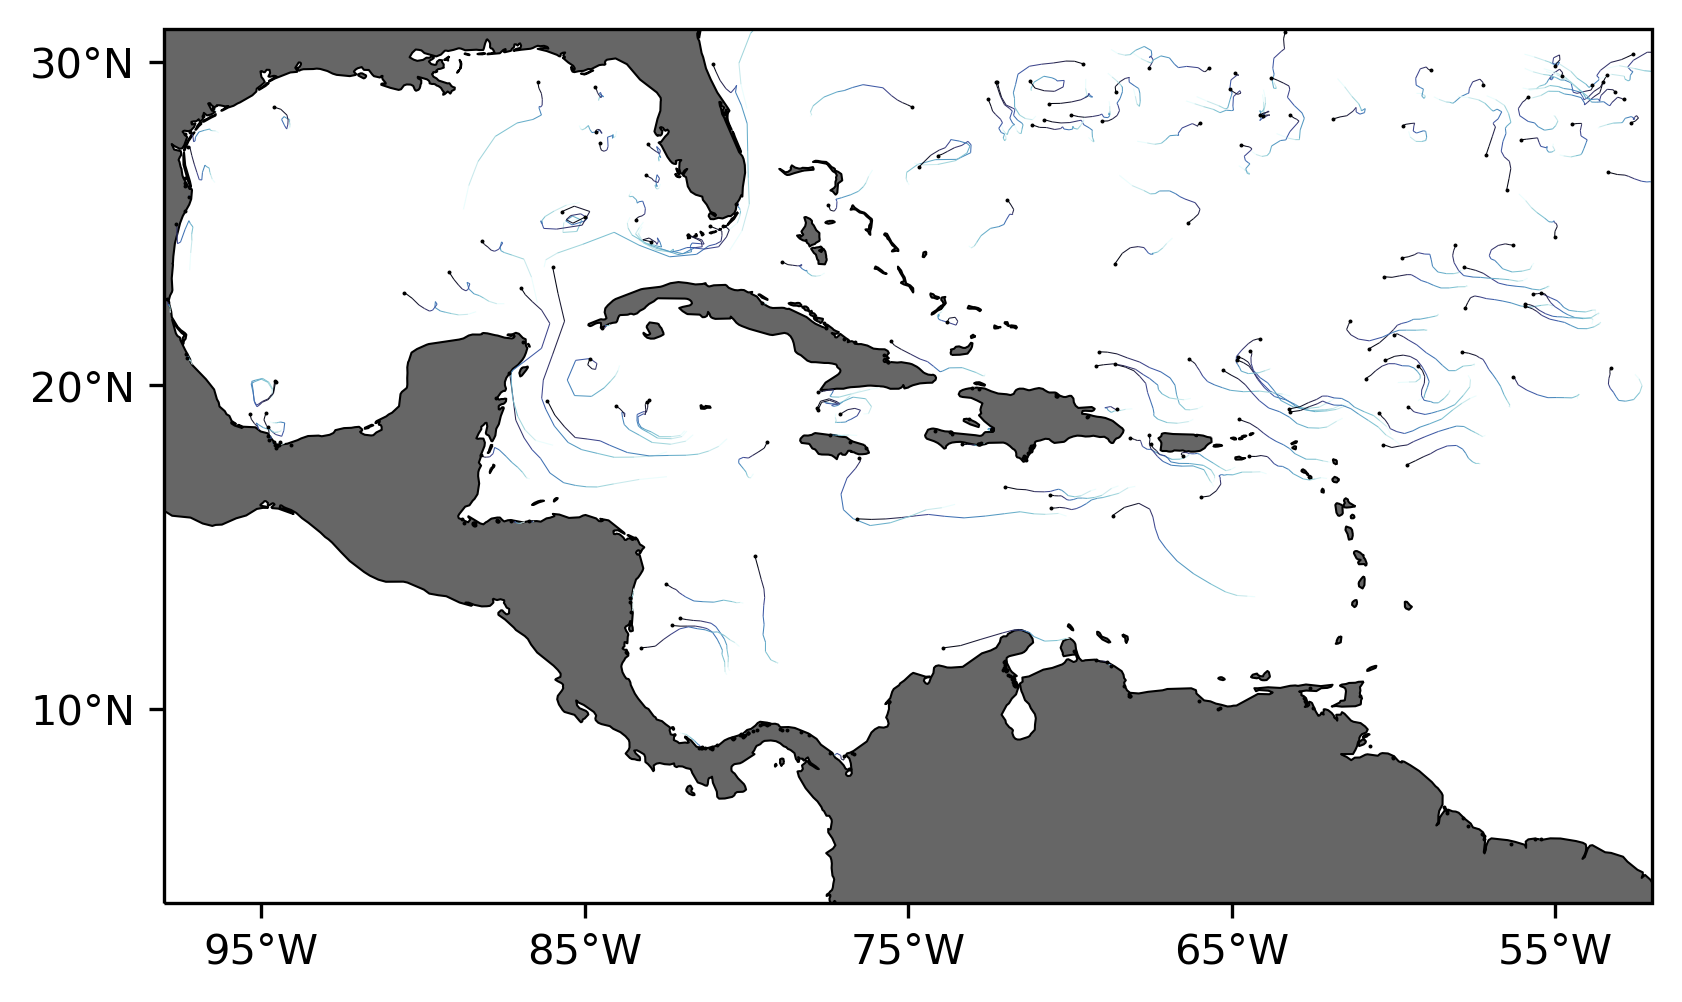

In [5]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(), aspect='equal')

ids = np.sort(np.random.choice(np.arange(0,nb_traj), size=nb_traj_plots, replace=False))
s, v = trajectories(ax, ids, t0, traj_length)

geo_map(ax)